EQUIPE:

Ana Clara de Sá Pinheiro Nobre - 2210435

Angelo Barcelos Rodrigues - 1810748

Júlio César Lima Bandeira De Melo - 2014894

Vithor Vilas Boas Santos - 2214624


In [2]:

!pip install ultralytics roboflow supervision -q

import os
import cv2
import supervision as sv
from ultralytics import YOLO
from google.colab import files
from IPython.display import display, Image


ROBOFLOW_API_KEY = "dtOhknRIPWyLUYkLlkes"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/5

In [3]:

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("vbs-works").project("cctv_car_bike_detection-fhqk8-lutyb")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cctv_car_bike_detection-1 in yolov8:: 100%|██████████| 2058/2058 [00:00<00:00, 7246.58it/s]


In [4]:

model = YOLO("yolov8n.pt")

model.train(
    data = os.path.join(dataset.location, "data.yaml"),
    epochs = 50,
    imgsz = 640,
    batch = 16,
    name = "car_detection_model",
    optimizer = "Adam",
    lr0 = 0.001,
    device = 0  # Usa GPU
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 91.0MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cctv_car_bike_detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=car_detection_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=100, perspective=0.0, plots

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 94.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1052.8±638.1 MB/s, size: 59.1 KB)


train: Scanning /content/cctv_car_bike_detection-1/train/labels... 986 images, 0 backgrounds, 0 corrupt: 100%|██████████| 986/986 [00:00<00:00, 1024.33it/s]

train: New cache created: /content/cctv_car_bike_detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 602.5±373.1 MB/s, size: 30.0 KB)


val: Scanning /content/cctv_car_bike_detection-1/valid/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 1868.59it/s]

val: New cache created: /content/cctv_car_bike_detection-1/valid/labels.cache


Plotting labels to runs/detect/car_detection_model/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/car_detection_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.43G      1.517      2.051      1.497         46        640: 100%|██████████| 62/62 [00:18<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         33        794     0.0361      0.288     0.0621     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.56G      1.496      1.301      1.413         51        640: 100%|██████████| 62/62 [00:18<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         33        794       0.86      0.326       0.37      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.7G      1.409      1.199      1.414        103        640: 100%|██████████| 62/62 [00:15<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         33        794      0.868      0.347      0.434      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.72G      1.394      1.106      1.395         44        640: 100%|██████████| 62/62 [00:16<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         33        794      0.863      0.311      0.367      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.88G      1.418        1.1      1.363         30        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         33        794      0.501      0.466      0.427      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.9G      1.436      1.059      1.366         96        640: 100%|██████████| 62/62 [00:15<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         33        794      0.613      0.595      0.647      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.08G      1.345      1.004      1.351         61        640: 100%|██████████| 62/62 [00:15<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         33        794      0.657      0.578      0.545      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.1G      1.359     0.9729      1.354         81        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         33        794      0.824      0.605      0.662      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.11G      1.323     0.9526      1.315         69        640: 100%|██████████| 62/62 [00:15<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         33        794      0.644      0.608      0.618      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.14G      1.363     0.9503      1.323         44        640: 100%|██████████| 62/62 [00:15<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         33        794      0.771      0.645      0.666      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.15G      1.324     0.8848      1.335         33        640: 100%|██████████| 62/62 [00:15<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         33        794       0.64      0.648      0.633      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.17G      1.317     0.8714      1.313         69        640: 100%|██████████| 62/62 [00:16<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         33        794      0.723      0.583      0.627      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.18G      1.319     0.8716      1.314         35        640: 100%|██████████| 62/62 [00:15<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         33        794      0.848      0.646      0.683      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.21G      1.317     0.8843      1.316         41        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        794      0.666      0.623      0.671      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.21G      1.278     0.8336      1.281         43        640: 100%|██████████| 62/62 [00:16<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         33        794      0.788      0.666      0.678      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.24G      1.275     0.8271      1.289         29        640: 100%|██████████| 62/62 [00:15<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         33        794      0.718      0.624      0.652      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.25G      1.247     0.8032      1.269         24        640: 100%|██████████| 62/62 [00:16<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         33        794      0.629      0.604      0.645       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.27G      1.229     0.7727      1.252         36        640: 100%|██████████| 62/62 [00:16<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         33        794      0.727      0.654      0.666      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.28G       1.27      0.776      1.265         93        640: 100%|██████████| 62/62 [00:15<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         33        794      0.725      0.626      0.676      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.31G      1.272     0.7838      1.266         28        640: 100%|██████████| 62/62 [00:15<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         33        794      0.742      0.635      0.655      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.48G      1.204     0.7493      1.254         80        640: 100%|██████████| 62/62 [00:16<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         33        794      0.748      0.624       0.67      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.51G      1.212     0.7316      1.239         58        640: 100%|██████████| 62/62 [00:15<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         33        794      0.788      0.679      0.696      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.52G      1.173      0.717      1.239        110        640: 100%|██████████| 62/62 [00:15<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        794      0.628      0.656      0.656      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.54G      1.186     0.7142      1.215         84        640: 100%|██████████| 62/62 [00:15<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33        794       0.72      0.637      0.697      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.55G      1.198     0.7112      1.217         28        640: 100%|██████████| 62/62 [00:16<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         33        794      0.728      0.681      0.697       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.75G      1.194     0.7177      1.216         37        640: 100%|██████████| 62/62 [00:15<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         33        794      0.704      0.647      0.677      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.76G      1.169     0.6869      1.215         47        640: 100%|██████████| 62/62 [00:15<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         33        794      0.751      0.669      0.655      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.79G      1.197     0.6863      1.233         43        640: 100%|██████████| 62/62 [00:16<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         33        794      0.754      0.654      0.644      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.8G      1.179     0.6885      1.227         48        640: 100%|██████████| 62/62 [00:15<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         33        794      0.712      0.609       0.58      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         4G      1.181     0.6937      1.215         60        640: 100%|██████████| 62/62 [00:15<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         33        794      0.744      0.649       0.66      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.01G      1.159     0.6732       1.22         77        640: 100%|██████████| 62/62 [00:15<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         33        794      0.698      0.686      0.662      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.04G      1.133     0.6621      1.204        115        640: 100%|██████████| 62/62 [00:16<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         33        794      0.773       0.63      0.649      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.04G       1.19     0.6922      1.195         34        640: 100%|██████████| 62/62 [00:15<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         33        794      0.693      0.683      0.615      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.07G       1.14     0.6443      1.191         64        640: 100%|██████████| 62/62 [00:15<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         33        794      0.714      0.701      0.662      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.08G      1.129     0.6515      1.194         29        640: 100%|██████████| 62/62 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         33        794       0.65      0.688      0.628      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.1G      1.132     0.6402      1.186         36        640: 100%|██████████| 62/62 [00:16<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         33        794      0.714      0.738      0.665        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.11G      1.126     0.6301      1.182         23        640: 100%|██████████| 62/62 [00:16<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         33        794      0.731      0.725      0.714      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.14G      1.086     0.6162      1.181         67        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         33        794       0.66      0.681      0.633      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.14G      1.104     0.6196      1.171        106        640: 100%|██████████| 62/62 [00:16<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         33        794      0.719      0.638      0.615      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.17G      1.064     0.6007       1.16         33        640: 100%|██████████| 62/62 [00:15<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         33        794      0.703      0.719      0.659      0.302


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.18G      1.076     0.5711      1.183         24        640: 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         33        794      0.776      0.618      0.661      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.21G      1.067     0.5508      1.173         21        640: 100%|██████████| 62/62 [00:15<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         33        794      0.776      0.655      0.679      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.21G      1.052     0.5427      1.169         51        640: 100%|██████████| 62/62 [00:14<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         33        794      0.778      0.689      0.673      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.24G      1.045     0.5385       1.16         40        640: 100%|██████████| 62/62 [00:15<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         33        794      0.764      0.671       0.67      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.25G      1.046      0.529      1.157         18        640: 100%|██████████| 62/62 [00:15<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         33        794      0.822      0.657      0.723      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.27G      1.034     0.5171      1.142         53        640: 100%|██████████| 62/62 [00:15<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         33        794      0.758      0.655      0.677      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.28G      1.023     0.5176      1.143         11        640: 100%|██████████| 62/62 [00:15<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         33        794      0.716      0.692      0.693       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.31G     0.9925     0.5024      1.125         10        640: 100%|██████████| 62/62 [00:14<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         33        794      0.691       0.67      0.646      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.32G      1.008     0.5076      1.133         14        640: 100%|██████████| 62/62 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         33        794      0.755      0.685      0.685      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.34G      1.023     0.5118      1.127         34        640: 100%|██████████| 62/62 [00:14<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         33        794      0.747       0.69      0.681      0.301



50 epochs completed in 0.235 hours.
Optimizer stripped from runs/detect/car_detection_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/car_detection_model/weights/best.pt, 6.2MB

Validating runs/detect/car_detection_model/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]


                   all         33        794      0.729      0.727      0.714      0.314
                  cars         33        772      0.761      0.827      0.842      0.393
             motorbike         12         22      0.697      0.627      0.586      0.234
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/car_detection_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de855a921d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [5]:
best_model = YOLO("/content/runs/detect/car_detection_model/weights/best.pt")

# Avaliação com métricas
metrics = best_model.val(
    split = "test",
    conf = 0.25,
    iou = 0.50
)

print("\n📊 RESULTADOS:")
print(f"mAP@0.5:    {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precisão:   {metrics.box.mp:.4f}")
print(f"Recall:     {metrics.box.mr:.4f}")

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 526.4±151.6 MB/s, size: 31.0 KB)


val: Scanning /content/cctv_car_bike_detection-1/test/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1257.95it/s]

val: New cache created: /content/cctv_car_bike_detection-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]


                   all          4         63      0.735      0.588      0.696      0.317
                  cars          4         58      0.804      0.776      0.793      0.388
             motorbike          3          5      0.667        0.4      0.598      0.246
Speed: 0.2ms preprocess, 18.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val

📊 RESULTADOS:
mAP@0.5:    0.6956
mAP@0.5:0.95: 0.3170
Precisão:   0.7351
Recall:     0.5879


Saving Screenshot from 2025-06-14 21-17-45.png to Screenshot from 2025-06-14 21-17-45.png

image 1/1 /content/Screenshot from 2025-06-14 21-17-45.png: 384x640 7 carss, 1 motorbike, 62.0ms
Speed: 3.4ms preprocess, 62.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


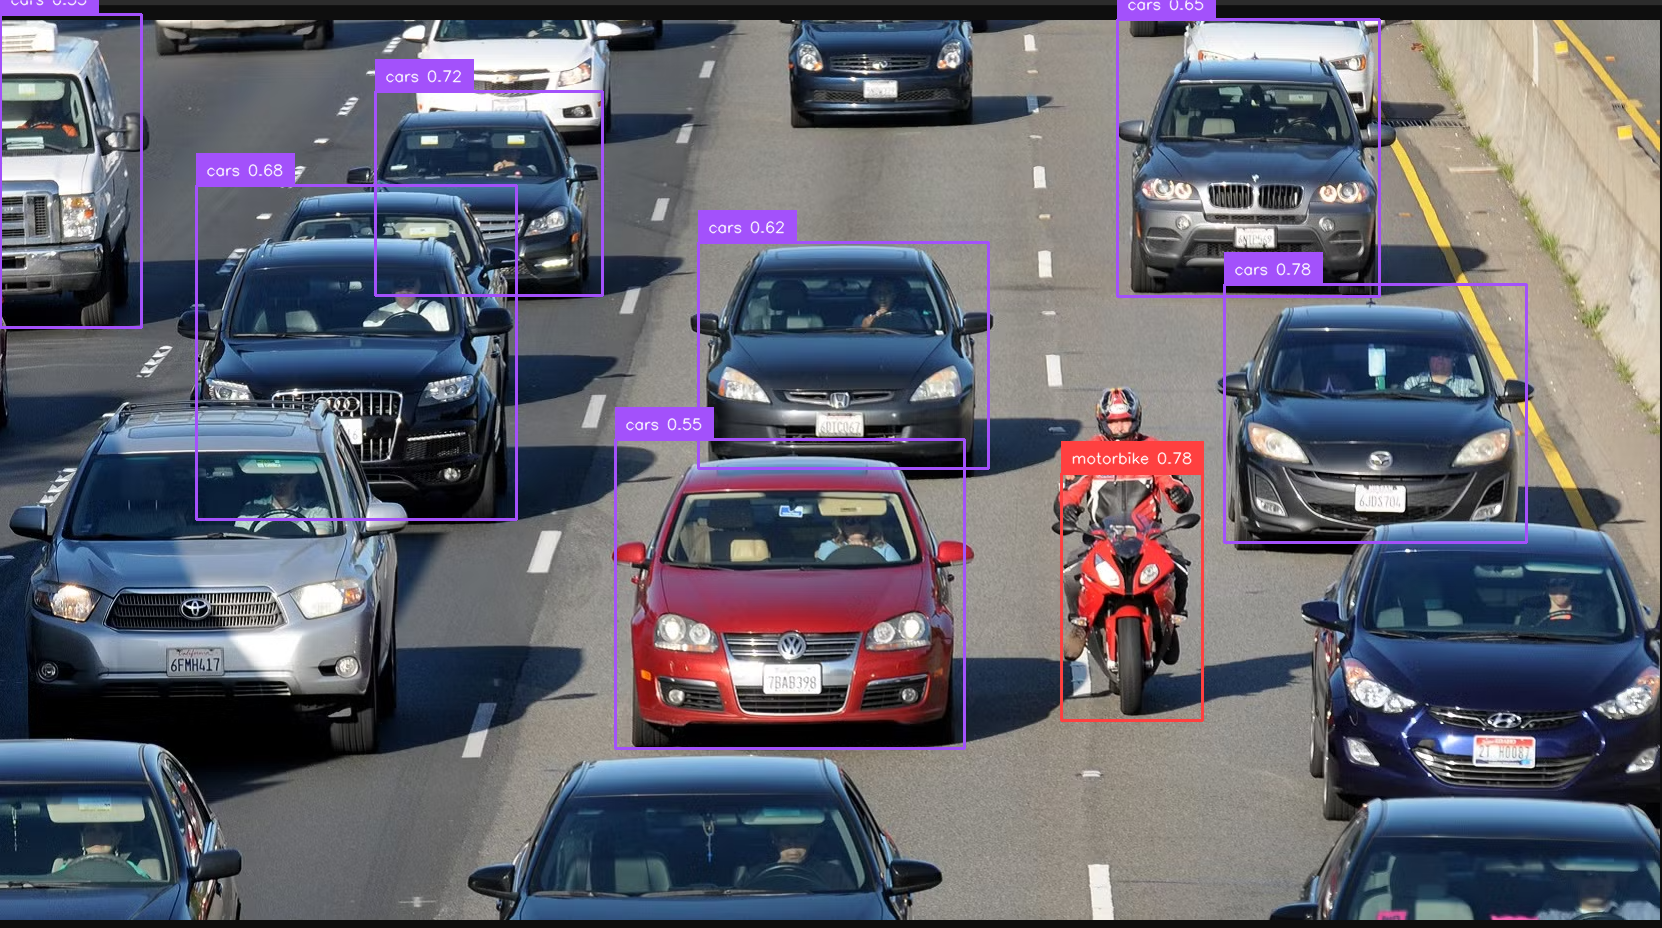

In [6]:
# ## 5. Teste com Imagem ou Vídeo Real
import os
import cv2
import supervision as sv
from tqdm.notebook import tqdm
from IPython.display import display, Image, HTML
from google.colab import files

def process_image(image_path, model):
    """Processa uma única imagem"""
    # Predição
    results = model.predict(
        source = image_path,
        conf = 0.5,
        save = False
    )

    # Visualização com anotações
    detections = sv.Detections.from_ultralytics(results[0])
    box_annotator = sv.BoxAnnotator(thickness=2)
    label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.5)
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Não foi possível ler a imagem: {image_path}")

    labels = [
        f"{model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id in zip(detections.confidence, detections.class_id)
    ]

    annotated_image = box_annotator.annotate(
        scene = image.copy(),
        detections = detections
    )

    annotated_image = label_annotator.annotate(
        scene = annotated_image,
        detections = detections,
        labels = labels
    )

    return annotated_image

def process_video(video_path, model):
    """Processa um vídeo frame por frame"""
    # Configuração do vídeo
    video_info = sv.VideoInfo.from_video_path(video_path)
    frame_generator = sv.get_video_frames_generator(video_path)

    # Cria annotators
    box_annotator = sv.BoxAnnotator(thickness=2)
    label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.5)

    # Processa cada frame e escreve no VideoSink
    output_path = f"result_{os.path.basename(video_path)}"
    with sv.VideoSink(output_path, video_info) as sink:
        for frame in tqdm(frame_generator, total=video_info.total_frames, desc="Processando vídeo"):
            results = model(frame, verbose=False, conf=0.5)[0]
            detections = sv.Detections.from_ultralytics(results)

            labels = [
                f"{model.names[class_id]} {confidence:0.2f}"
                for confidence, class_id in zip(detections.confidence, detections.class_id)
            ]

            annotated_frame = box_annotator.annotate(
                scene=frame.copy(),
                detections=detections
            )

            annotated_frame = label_annotator.annotate(
                scene=annotated_frame,
                detections=detections,
                labels=labels
            )

            sink.write_frame(annotated_frame)

    return output_path, video_info

# Carrega o melhor modelo
best_model = YOLO("/content/runs/detect/car_detection_model/weights/best.pt")

# Upload de arquivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Determina se é imagem ou vídeo
is_video = file_name.lower().endswith(('.mp4', '.avi', '.mov'))
is_image = file_name.lower().endswith(('.jpg', '.jpeg', '.png'))

if is_image:
    # Processa imagem
    annotated_image = process_image(file_name, best_model)
    output_path = f"result_{file_name}"
    cv2.imwrite(output_path, annotated_image)
    display(Image(output_path))

elif is_video:
    # Processa vídeo
    output_path, video_info = process_video(file_name, best_model)

    print(f"Vídeo completo salvo em: {output_path}")

    # Opção para download
    files.download(output_path)
else:
    print("Formato de arquivo não suportado. Use imagens (JPG/PNG) ou vídeos (MP4/AVI/MOV).")